Задача: полная предобработка данных

Датасет Bank Marketing Dataset

Ссылка : https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing

Целевая переменная: deposit (будет ли клиент открывать депозит).



1. Базовый анализ

In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import os

In [ ]:
import kagglehub
path = kagglehub.dataset_download("henriqueyamahata/bank-marketing")
import os
for file in os.listdir(path):
    if file.endswith('.csv'):
        df = pd.read_csv(os.path.join(path, file), sep=';')
        print(f"Загружен файл: {file}")
        break

Загружен файл: bank-additional-full.csv


In [ ]:
df = df.drop('duration', axis=1)

In [ ]:
X=df.drop('y', axis=1)
y=df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2, stratify  =y)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

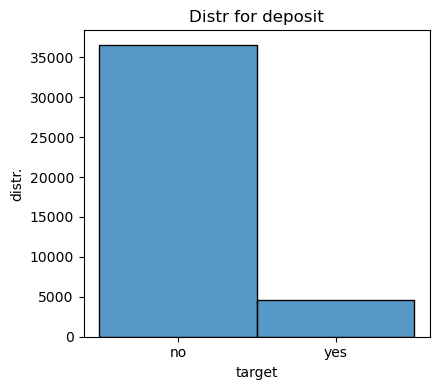

Да: 4640, (11.2654 %); Нет: 36548, (88.7346 %)


In [ ]:
df.info()
df.describe()

plt.figure(figsize=(4.5, 4))
sns.histplot(df, x='y')
plt.xlabel('target')
plt.ylabel('distr.')
plt.title(f'Distr for deposit')
plt.tight_layout()
plt.show()

yes=len(df[df['y']=='yes'])
no=len(df[df['y']=='no'])
shape = df.shape
print(f"Да: {yes}, ({yes*100/shape[0]:.4f} %); Нет: {no}, ({no*100/shape[0]:.4f} %)")

In [ ]:
numss = X_train.select_dtypes(include = ['number']).columns
cats = X_train.select_dtypes(include = ['object', 'category']).columns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
rf.fit(X_train[numss], y_train)
y_pred = rf.predict(X_test[numss])
as1=accuracy_score(y_test, y_pred)
print(as1)

0.8892935178441369


2. Обработка пропусков

In [ ]:
for i in df.columns:
    x = 0
    if df[i].dtype=='object':
        x = len(df[df[i].str.lower()=='unknown'])
    if x>0:
        print(i, x)

job 330
marital 80
education 1731
default 8597
housing 990
loan 990


1 способом:

In [ ]:
X_train_del = X_train.copy()
y_train_del = y_train.copy()
for i in cats:
    mask = X_train_del[i].str.lower()=='unknown'
    X_train_del = X_train_del[~mask]
    y_train_del = y_train_del[~mask]

numss_del = X_train_del.select_dtypes(include = ['number']).columns

rf_del = RandomForestClassifier()
rf_del.fit(X_train_del[numss_del], y_train_del)
y_pred_del = rf_del.predict(X_test[numss_del])
as2=accuracy_score(y_test, y_pred_del)
print(as2)

0.8839524156348628


2 способом :

In [ ]:
from sklearn. impute import SimpleImputer

imputer = SimpleImputer(strategy = 'most_frequent')
X_train_imp_cat = imputer.fit_transform(X_train[cats])
X_train_imp = X_train.copy()
X_train_imp[cats] = X_train_imp_cat

numss_imp = X_train_imp.select_dtypes(include = ['number']).columns

rf_imp = RandomForestClassifier()
rf_imp.fit(X_train_imp[numss_imp], y_train)
y_pred_imp = rf_imp.predict(X_test[numss_imp])
as3=accuracy_score(y_test, y_pred_imp)
print(as3)

0.8875940762320952


3. Кодирование категориальных признаков



In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

les = {}
X_train_imp_le =  X_train_imp.copy()
for i in cats:
    le = LabelEncoder()
    X_train_imp_le[i]=le.fit_transform(X_train_imp[i])
    les[i] = le

X_test_imp_le =  X_test.copy()
for i in cats:
    X_test_imp_le[i]=les[i].transform(X_test[i])

rf_imp_le = RandomForestClassifier()
rf_imp_le.fit(X_train_imp_le, y_train)
y_pred_imp_le = rf_imp_le.predict(X_test_imp_le)
as4=accuracy_score(y_test, y_pred_imp_le)
print(as4)

0.8965768390386016


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X_train_imp_ohe = X_train_imp.copy()
X_test_imp_ohe = X_test.copy()

preprocessor = ColumnTransformer([
    ('nums','passthrough', numss),
    ('cats', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), cats)
])

X_train_imp_ohe=preprocessor.fit_transform(X_train_imp_ohe)
X_test_imp_ohe=preprocessor.transform(X_test_imp_ohe)

rf_imp_ohe = RandomForestClassifier()
rf_imp_ohe.fit(X_train_imp_ohe, y_train)
y_pred_imp_ohe = rf_imp_ohe.predict(X_test_imp_ohe)
as5=accuracy_score(y_test, y_pred_imp_ohe)
print(as5)

0.895241563486283


4. Обработка выбросов


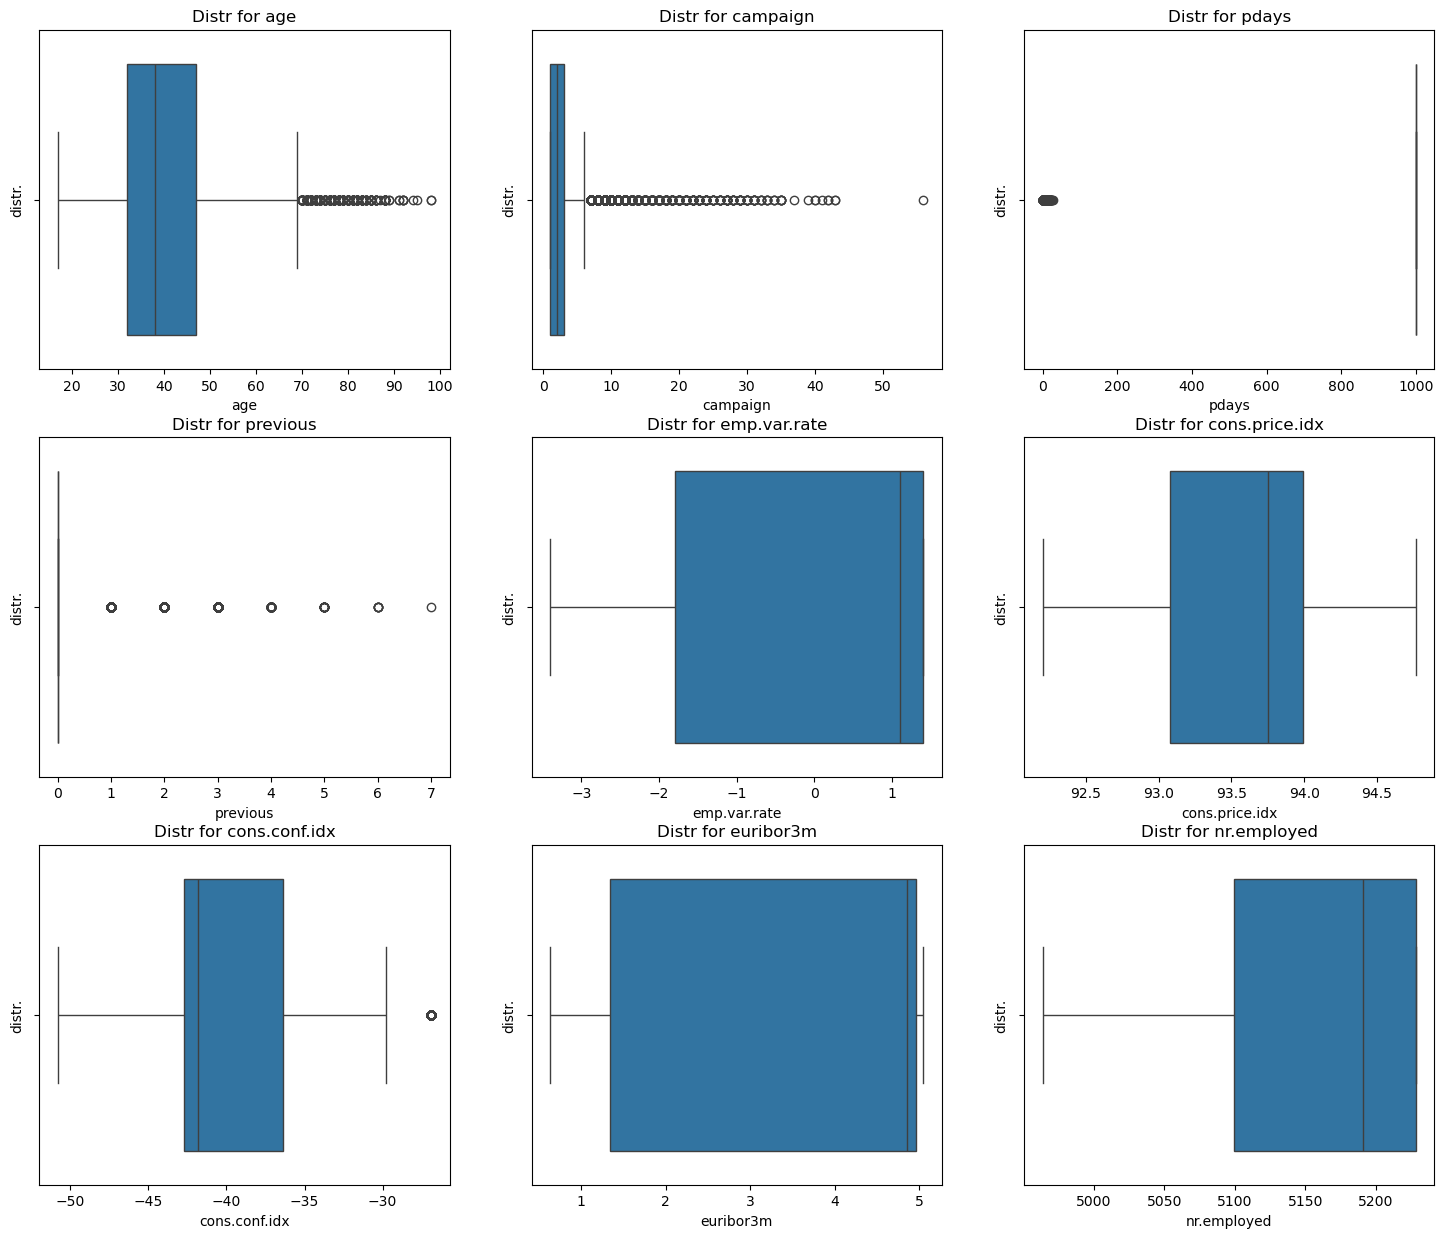

In [ ]:
plt.figure(figsize=(18, 5*((len(numss)+2)//3)))
for i, col in enumerate(numss):
    plt.subplot((len(numss)+2)//3, 3, i+1)
    sns.boxplot(x=df[col])
    plt.xlabel(col)
    plt.ylabel('distr.')
    plt.title(f'Distr for {col}')

In [ ]:
#делаем дф из полученного эррея прошлого задания
X_train2 = pd.DataFrame(
    X_train_imp_ohe,
    columns=preprocessor.get_feature_names_out(),
    index=X_train_imp.index
)

X_test2 = pd.DataFrame(
    X_test_imp_ohe,
    columns=preprocessor.get_feature_names_out(),
    index=X_test.index
)

In [ ]:
def trim(df, df2, numss):
    for i in numss:
        if i in df.columns:
            Q1=df[i].quantile(0.25)
            Q3=df[i].quantile(0.75)
            iqr = Q3-Q1
            l_b=Q1-1.5*iqr
            u_b=Q3+1.5*iqr
            df[i] = df[i].clip(l_b, u_b)
            df2[i] = df2[i].clip(l_b, u_b)
    return df, df2

X_train2, X_test2=trim(X_train2, X_test2, numss)

rf2 = RandomForestClassifier()
rf2.fit(X_train2, y_train)
y_pred2 = rf2.predict(X_test2)
as6=accuracy_score(y_test, y_pred2)
print(as6)

0.8954843408594318


5. Масштабирование признаков



In [ ]:
from sklearn.preprocessing import StandardScaler

X_train2_mm = X_train2.copy()
X_test2_mm = X_test2.copy()
mm= StandardScaler()
X_train2_mm=mm.fit_transform(X_train2_mm)
X_test2_mm=mm.transform(X_test2_mm)

rf_mm = RandomForestClassifier()
rf_mm.fit(X_train2_mm, y_train)
y_pred_mm = rf_mm.predict(X_test2_mm)
as7=accuracy_score(y_test, y_pred_imp)
print(as7)

0.8875940762320952


6. Итоги

In [ ]:
ress = pd.DataFrame ({
    'model': ['без всего', 'delete_nans', 'imputer', 'imp+LE', 'imp+OHE', 'imp+OHE+trim', 'imp+OHE+trim+SS' ],
    'accuracy_score': [as1, as2, as3, as4 ,as5, as6, as7]
})

print(ress)

             model  accuracy_score
0        без всего        0.889294
1      delete_nans        0.883952
2          imputer        0.887594
3           imp+LE        0.896577
4          imp+OHE        0.895242
5     imp+OHE+trim        0.895484
6  imp+OHE+trim+SS        0.887594
